In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from warnings import filterwarnings
filterwarnings("ignore")


Inferance:

    Importing pandas for data manipulation,
    seaborn and matplotlib for data visualization,
    mlxtend for apriori and association rules,
    warning.filterwarnings for avoid warnings.

In [3]:
df = pd.read_csv("data\Market_Basket_Optimisation.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Inferance:

    Loading dataset and displaying its top 5 records

# EDA

In [4]:
count_dict= dict()
for row in df.iterrows():
    for item in row[1]:
        if item not in count_dict.keys():
            count_dict[item] = 1
        else:
            count_dict[item] += 1


len(count_dict.keys())

121

Inferance:

    Creating dictionary containing number of item occured in all the transactions


In [5]:
values_count = pd.DataFrame(count_dict.values(), index=count_dict.keys())
top_items = values_count.sort_values(by=0, ascending=False)[1:31]
top_items.sample(5)

,0
champagne,351
ground beef,737
chicken,450
escalope,595
cookies,603


Inferance:

    Getting output of above code and sorting it in correct order

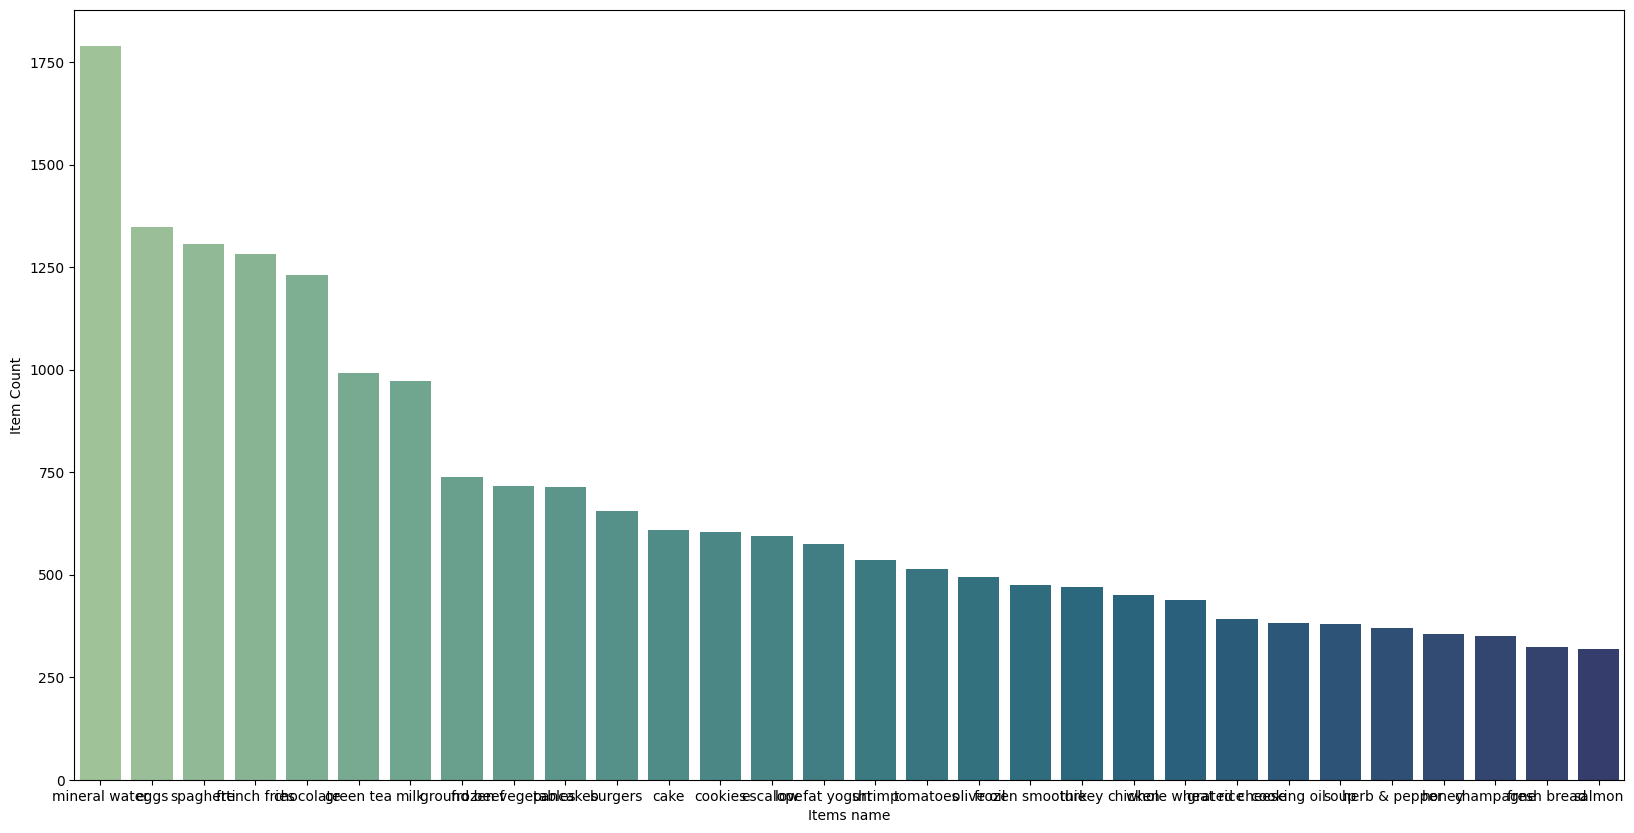

In [6]:
plt.figure(figsize=(20,10))
plt.xlabel("Items name")
plt.ylabel("Item Count")
sns.barplot(x=top_items.index, y=top_items[0], palette=sns.color_palette('crest', n_colors=30))
plt.show()

Inferance:

    Plotting bar chart for the top 30 items occured in our dataset

# Data Manipulation

In [7]:
transaction_list = []
for row in df.iterrows():
    transaction_list.append(list(row[1]))
    
print(transaction_list)

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], ['chutney', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], ['turkey', 'avocado', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], ['low fat yogurt', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], ['whole wheat pasta', 'french fries', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

Inferance:

    creating a list storing all the transactions in our dataset

In [8]:
transactions_df = pd.DataFrame(transaction_list)

encoding = pd.get_dummies(transactions_df.stack(), dtype=int).groupby(level=0).sum()

encoding_without_nan = (encoding > 0).astype(int)
encoding_without_nan

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Inferance:

    Converting above list into one-hot encoded vector and creating new dataframe called 'encoding_without_nan' to store the vector

In [16]:
apriori_df

,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)
5,0.046794,(champagne)
6,0.059992,(chicken)
7,0.163845,(chocolate)
8,0.080389,(cookies)
9,0.051060,(cooking oil)


In [9]:
apriori_df = apriori(encoding_without_nan, min_support=0.03, use_colnames=True)
asso_rules = association_rules(apriori_df, metric="confidence", min_threshold=0.2)

Inferance:

    applying apriori algorithm and deriving assocaition rules based upon it

In [10]:
asso_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,0.003751,1.028711,0.135143
1,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,0.006393,1.049383,0.222275
2,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,0.006393,1.046827,0.224169
3,(milk),(chocolate),0.129583,0.163845,0.032129,0.247942,1.513276,0.010898,1.111823,0.389677
4,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
5,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
6,(spaghetti),(chocolate),0.174110,0.163845,0.039195,0.225115,1.373952,0.010668,1.079070,0.329550
7,(chocolate),(spaghetti),0.163845,0.174110,0.039195,0.239219,1.373952,0.010668,1.085581,0.325505
8,(eggs),(french fries),0.179709,0.170911,0.036395,0.202522,1.184961,0.005681,1.039640,0.190286
9,(french fries),(eggs),0.170911,0.179709,0.036395,0.212949,1.184961,0.005681,1.042232,0.188267


Best combinations


In [11]:
best_rules = asso_rules[(asso_rules.confidence>0.3) & (asso_rules.lift>1)].reset_index()
best_rules[:5]

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,5,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
1,15,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270,0.402413
2,17,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
3,19,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
4,20,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465


Inferance:

    Displaying best of 5 product combinations 

Worst combinations


In [12]:
worst_rules = asso_rules[(asso_rules.confidence<0.3) & (asso_rules.lift<1)].reset_index()
worst_rules

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,16,(green tea),(mineral water),0.132116,0.238368,0.031063,0.235116,0.986357,-0.00043,0.995748,-0.015688


Inferance:

    Displaying worst of product combinations 

# Plotting pie-chart

Pie-chart

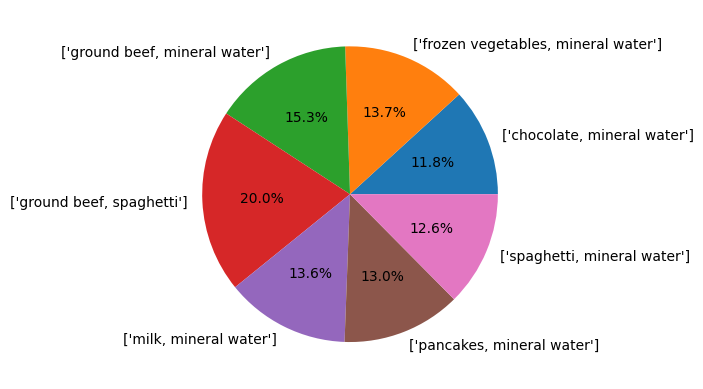

In [13]:
label_lists=[]
for support, confidence in best_rules[["antecedents", "consequents"]].values:
    label_lists.append([", ".join([str(support).split("'")[1], str(confidence).split("'")[1]])])

plt.pie(best_rules.lift, labels=label_lists, labeldistance=1.1,autopct='%1.1f%%')
plt.show()

Inferance:

    Creating pie-chart which displays the percentage of the lift in top 5 items in our itemset

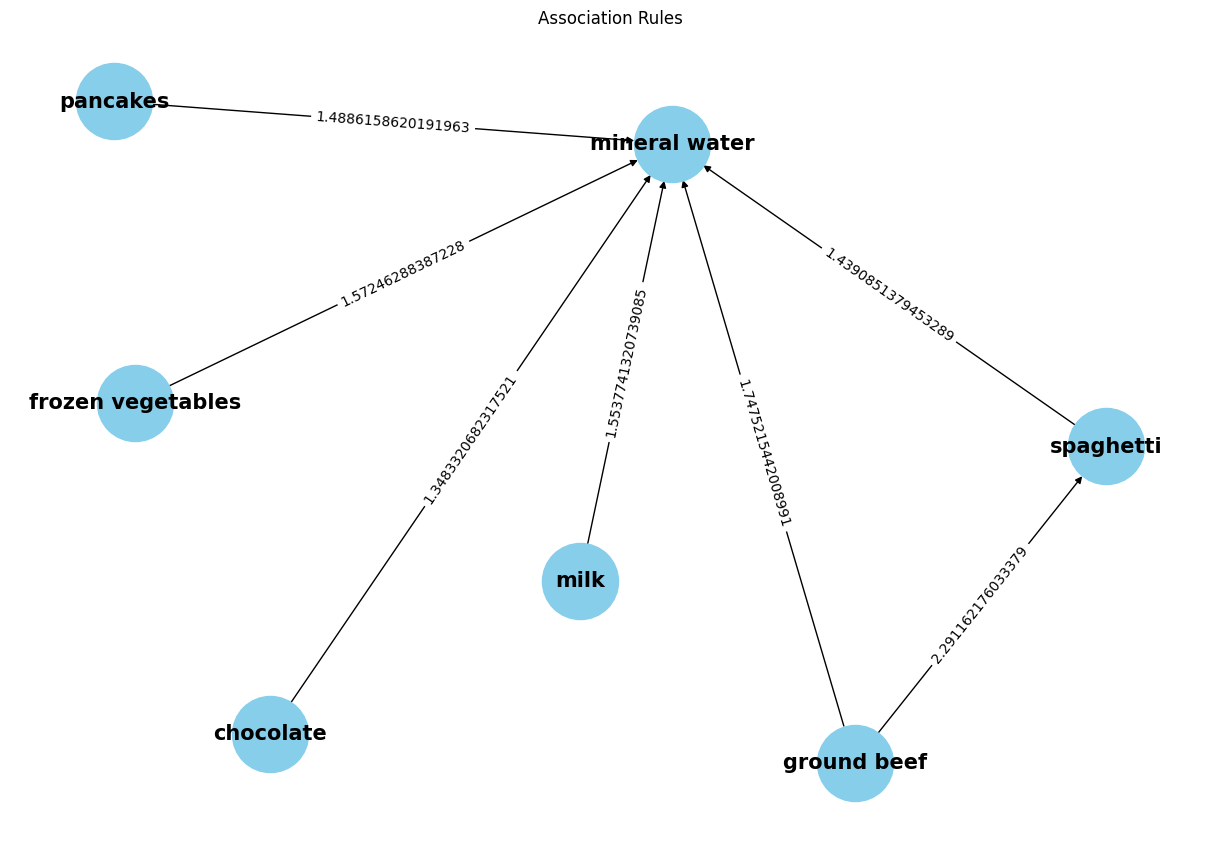

In [14]:
import networkx as nx

G = nx.DiGraph()

for _, row in best_rules.iterrows():
    G.add_edge(str(row['antecedents']).split("'")[1], str(row['consequents']).split("'")[1], weight=row['lift'])

pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=15, font_weight="bold", arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Association Rules')
plt.show()


Inferance:

    Plotting store layout graph to show, how we should arrange items in our store layout so that we can maximize our sales 

Plotting Cross sell matrix

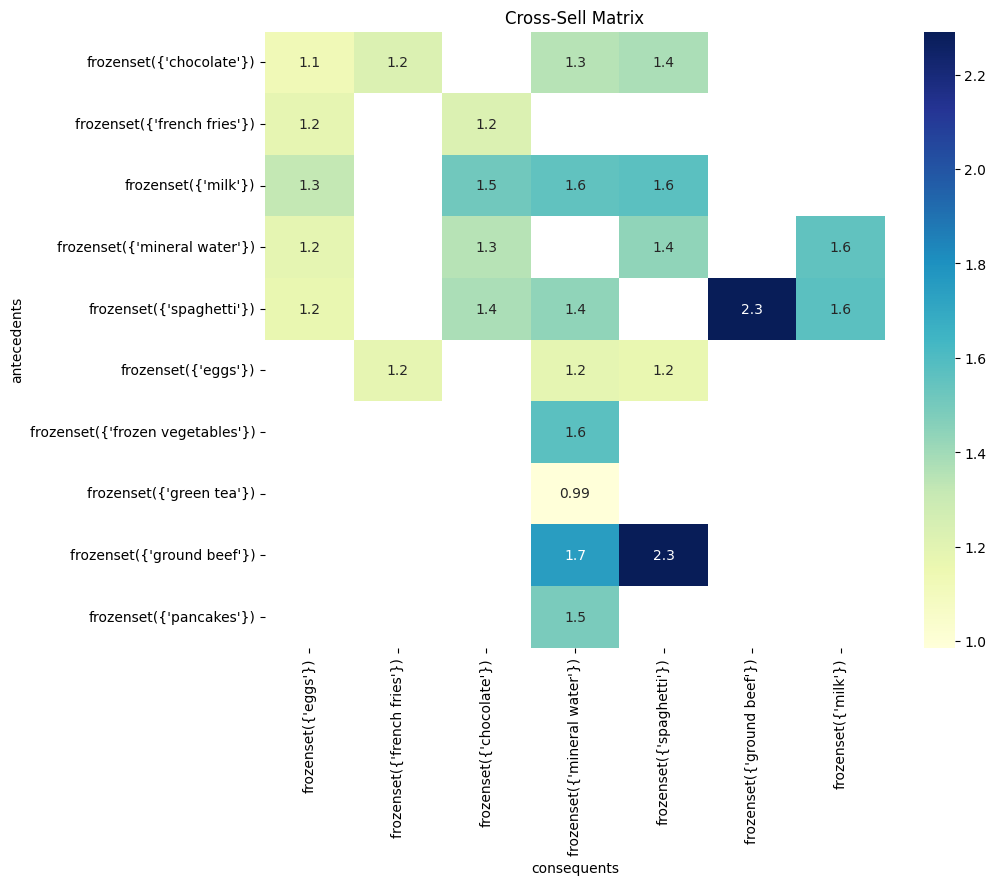

In [15]:
cross_sell_matrix = asso_rules.pivot(index='antecedents', columns='consequents', values='lift')

# Plot the cross-sell matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cross_sell_matrix, annot=True, cmap="YlGnBu")
plt.title('Cross-Sell Matrix')
plt.show()

Inferance:

    Plotting cross sell matrix for verifying success of the cross-selling |strategy through before-and-after comparison